# Tutorial 1: Reachable Set Computation

This tutorial demonstrates how the CommonRoad Reach package can be used to compute the reachable sets of a considered ego vehicle given a CommonRoad scenario.

Please make sure you have correctly installed the package and gone through the tutorials for **CommonRoad Input-Output** beforehand.

## Building Configuration

Computing the reachable sets is as easy as building a configuration file and executing the computation. In the following, we explain some of the important parameters in the configuration file.

* `planning.time_steps_computation`: Number of time steps for which the reachable set should be computed.
* `planning.coordinate_system`: Coordinate system in which teh reachable set should be computed. Computations in the Cartesian ("CART") or curvilinear ("CVLN") coordinate systems are supported.
* `planning.reference_point`: Reference point on the vehicle. This can either be set on the center ("CENTER") or on the rear axle ("REAR") of the vehicle. This affects the results of collision checking with surrounding obstacles.
* `vehicle.ego`: Ego vehicle-specific paramters. Note that the velocity and acceleration profiles are typically set differently for computations in the Cartesian and curvilinear coordinate systems.
* `reachable_set.mode_computation`: Parameter indicating the mode for reachable set computation. Computations with Python backend, C++ backend, and graph-based propagation (both offline and online) are supported.
* `reachable_set.mode_repartition`: Parameter indicating the mode for drivable area repartition.
* `reachable_set.size_grid`: Grid size for discretizing drivable area.
* `reachable_set.radius_terminal_split`: Threshold for terminating the split of drivable areas in collision checks.

The configuration is often built from default parameters (located in `./configurations/defaults/`) and scenario-specific parameters. If you wish you override a parameter for a specific scenario, simply create a `.yaml` file with the name of the scenario under `./configurations/` and set the parameter in it.

We proceed with building the configuration for an example scenario.

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# add root folder to Python interpreter's path
import os
import sys
sys.path.append("../")

import commonroad_reach.utility.logger as util_logger
from commonroad_reach.data_structure.configuration_builder import ConfigurationBuilder
from commonroad_reach.data_structure.reach.reach_interface import ReachableSetInterface
from commonroad_reach.utility import visualization as util_visual

# ==== specify scenario
name_scenario = "ARG_Carcarana-1_1_T-1"

# ==== build configuration
config = ConfigurationBuilder.build_configuration(name_scenario)
util_logger.initialize_logger(config)
config.print_configuration_summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
# ===== Configuration Summary ===== #
# ARG_Carcarana-1_1_T-1
# Planning:
# 	time steps: 30
# 	coordinate system: curvilinear
# Reachable set:
# 	computation mode: polytopic, c++ backend
# 	repartition mode: collision check, repartition
# 	grid size: 0.2
# 	terminal split radius: 0.7
# 	prune: True
# ================================= #


## Executing Computation & Visualization

Invoking reachable set computation is done via the `ReachableSetInterface` class.

In [13]:
# ==== compute reachable sets using reachability interface
reach_interface = ReachableSetInterface(config)
reach_interface.compute_reachable_sets()

* Computing reachable sets...
	Computation took: 	0.043s


* Plotting reachable sets...
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00000.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00001.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00002.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00003.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00004.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00005.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00006.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00007.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00008.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00009.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00010.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00011.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00012.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00013.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00014.png
	Saving ../output/ARG_Carcarana-1_1_T-1/reachset_00015.png
	Saving ../output/ARG_Carca

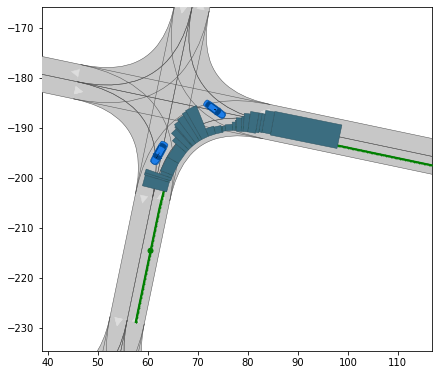

In [14]:
# ==== save computation results as gifs
util_visual.plot_scenario_with_reachable_sets(reach_interface, figsize=(7, 7))

* Plotting reachable sets...


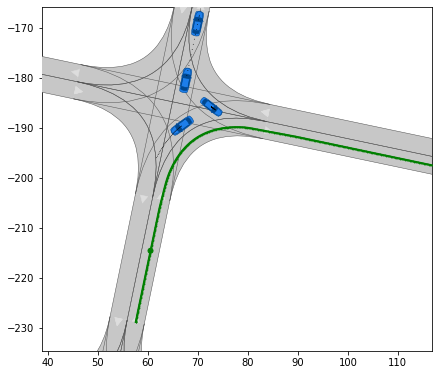

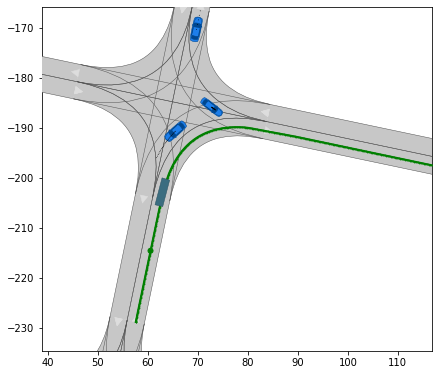

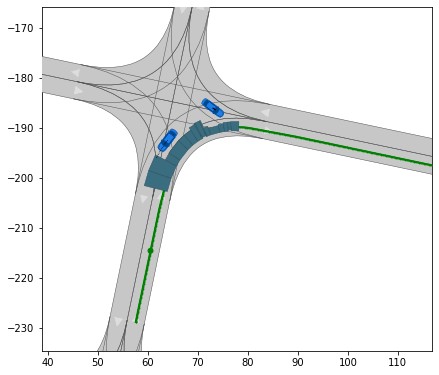

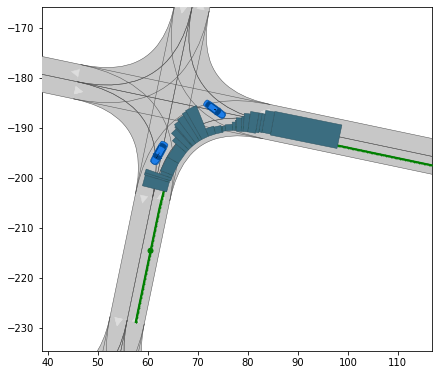

	Reachable sets plotted.


In [15]:
# ==== visualize reachable sets at specified time steps
config.debug.save_plots = 0
util_visual.plot_scenario_with_reachable_sets(reach_interface, time_steps=[0, 10, 20, 30], figsize=(7, 7))